In [1]:
import pandas as pd
import numpy as np
import shared
import json
import joblib

ve_or_ju = "ju"

In [2]:
with open(f"data/top_countries_{ve_or_ju}.json") as json_file:
    top_countries = json.load(json_file)
top_countries    

['FIN',
 'SWE',
 'NOR',
 'RUS',
 'LAT',
 'EST',
 'SUI',
 'GBR',
 'LTU',
 'DEN',
 'GER',
 'FRA',
 'ESP',
 'CZE',
 'POL',
 'ITA',
 'USA',
 'UKR',
 'HUN']

In [3]:
with open(f"data/top_first_names_{ve_or_ju}.json") as json_file:
    top_first_names = json.load(json_file)
top_first_names 

['mikko',
 'antti',
 'timo',
 'juha',
 'matti',
 'jukka',
 'pekka',
 'mika',
 'jari',
 'jussi',
 'janne',
 'ville',
 'hannu',
 'heikki',
 'kari',
 'markku',
 'petri',
 'sami',
 'tuomas',
 'teemu',
 'marko',
 'harri',
 'lauri',
 'markus',
 'ari',
 'pasi',
 'vesa',
 'olli',
 'jouni',
 'jaakko',
 'eero',
 'arto',
 'tero',
 'juho',
 'tommi',
 'kimmo',
 'jani',
 'jarmo',
 'seppo',
 'risto',
 'tomi',
 'ilkka',
 'esa',
 'jarkko',
 'kalle',
 'tuomo',
 'tapio',
 'jyrki',
 'johan',
 'anders',
 'jorma',
 'simo',
 'erkki',
 'erik',
 'toni',
 'juhani',
 'petteri',
 'jouko',
 'jonas',
 'mikael',
 'joonas',
 'henrik',
 'lasse',
 'pertti',
 'aleksi',
 'martin',
 'henri',
 'jan',
 'aki',
 'niko',
 'samuli',
 'andreas',
 'anssi',
 'juuso',
 'esko',
 'pauli',
 'matias',
 'fredrik',
 'paavo',
 'miika',
 'joni',
 'peter',
 'riku',
 'niklas',
 'anton',
 'tapani',
 'reijo',
 'daniel',
 'martti',
 'kai',
 'jarno',
 'raimo',
 'panu',
 'stefan',
 'thomas',
 'keijo',
 'magnus',
 'per',
 'simon',
 'sakari',
 'pen

In [4]:
history = pd.read_csv('data/grouped_paces_ju.tsv', delimiter="\t")
history.head()

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,pace_7
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,5.762,6.251,5.843,5.796,NaN,NaN
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,5.621,6.100,5.977,7.164,5.642,5.974
2,3.0,DELTA;KOOVEE;HIIDENKIERTÄJÄT,lauri sild,7,7,5.933,0.382,2,FIN,5.836,5.851,5.996,5.829,6.765,5.391,5.866
3,18.0,OK ORION;KOOVEE,oleksandr kratov,3,3,6.069,0.363,4,SWE,5.703,5.940,6.563,NaN,NaN,NaN,NaN
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,5.662,5.837,6.014,6.562,NaN,NaN


In [5]:
# HISTORY: ""mean_team_id"	"teams"	"name"	"num_runs"	"num_valid_times"	"mean_pace"	"stdev"	"most_common_leg"	"most_common_country"	
# "pace_1"	"pace_2"	"pace_3"	"pace_4"	"pace_5"	"pace_6"	"pace_7"
# RUNS: "team"	"team_country"	"pace"	"leg_nro"	"num_runs"
history["year"] = "NA"
history["pace"] = "NA"
history["team"] = "NA"
history["leg_nro"] = history["most_common_leg"]
history["team_id"] = history["mean_team_id"]
history["team_country"] = history["most_common_country"]






In [6]:
history[history["num_runs"] > 4]

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,...,pace_4,pace_5,pace_6,pace_7,year,pace,team,leg_nro,team_id,team_country
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,...,5.843,5.796,NaN,NaN,NA,NA,NA,1,18.5,FIN
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,...,5.977,7.164,5.642,5.974,NA,NA,NA,1,12.0,FIN
2,3.0,DELTA;KOOVEE;HIIDENKIERTÄJÄT,lauri sild,7,7,5.933,0.382,2,FIN,5.836,...,5.829,6.765,5.391,5.866,NA,NA,NA,2,3.0,FIN
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,...,6.014,6.562,NaN,NaN,NA,NA,NA,7,21.0,FIN
5,3.0,DELTA;KOOVEE;HIIDENKIERTÄJÄT,timo sild,7,7,5.630,0.335,6,FIN,5.526,...,5.378,6.293,5.346,5.748,NA,NA,NA,6,3.0,FIN
6,5.5,KOOVEE;KRISTIANSAND OK,daniel hubmann,6,6,5.646,0.520,7,FIN,5.294,...,5.172,6.752,5.432,NaN,NA,NA,NA,7,5.5,FIN
8,12.0,IFK GÖTEBORG;MARKBYGDENS OK,johan högstrand,5,5,6.117,0.449,2,SWE,5.794,...,6.571,6.728,NaN,NaN,NA,NA,NA,2,12.0,SWE
9,9.0,IFK GÖTEBORG,vetle ruud bråten,5,5,5.705,0.185,3,SWE,5.525,...,5.615,6.060,NaN,NaN,NA,NA,NA,3,9.0,SWE
10,16.0,IFK GÖTEBORG,jonas pilblad,6,6,6.154,0.389,2,SWE,6.509,...,6.819,5.756,6.089,NaN,NA,NA,NA,2,16.0,SWE
11,85.5,NYKÖPINGS OK;IFK GÖTEBORG,jens wängdahl,6,5,6.181,0.341,3,SWE,5.826,...,6.195,6.600,NaN,NaN,NA,NA,NA,3,85.5,SWE


In [7]:
features = shared.preprocess_features(history, top_countries, top_first_names)
features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 22 columns):
mean_team_id           30755 non-null float64
teams                  30755 non-null object
name                   30755 non-null object
num_runs               30755 non-null int64
num_valid_times        30755 non-null int64
mean_pace              28895 non-null float64
stdev                  28895 non-null float64
most_common_leg        30755 non-null int64
most_common_country    30361 non-null object
pace_1                 28895 non-null float64
pace_2                 16336 non-null float64
pace_3                 11541 non-null float64
pace_4                 8326 non-null float64
pace_5                 5925 non-null float64
pace_6                 3827 non-null float64
pace_7                 1671 non-null float64
year                   30755 non-null object
pace                   30755 non-null object
team                   30755 non-null object
leg_nro                30755 non-

None

,team_id,team_id_log10,leg_1,leg_2,leg_3,leg_4,leg_5,leg_6,leg_7,c_CZE,...,fn_viktor,fn_vili,fn_ville,fn_visa,fn_vladimir,fn_väinö,fn_william,fn_yrjö,fn_öystein,fn_öyvind
0,18.5,1.267172,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.0,1.079181,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,0.477121,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.0,1.255273,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,1.322219,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3.0,0.477121,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5.5,0.740363,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,8.5,0.929419,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12.0,1.079181,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9.0,0.954243,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x = features.values
x.shape

(30755, 490)

In [9]:

#pmlearn_linear = joblib.load('pmlearn_linear.sav')
gbr = joblib.load('gbr.sav')
gbr_q_low = joblib.load('gbr_q_low.sav')
gbr_q_high = joblib.load('gbr_q_high.sav')


In [10]:
#pmlearn_preds = pmlearn_linear.predict(features, return_std=True)
gbr_preds = gbr.predict(features)
gbr_q_low_preds = gbr_q_low.predict(features)
gbr_q_high_preds = gbr_q_high.predict(features)

In [11]:
gbr_preds

array([1.81103097, 1.77006833, 1.80048369, ..., 1.83846888, 1.86759701,
       1.84805425])

In [12]:
gbr_sd_estimate = pd.DataFrame({
    'log_q_low':gbr_q_low_preds,
    'predicted':np.exp(gbr_preds), 
    'log_q_high':gbr_q_high_preds, 
})

# Propably unjustified way to estimate standard deviation
gbr_sd_estimate["log_std"] = (gbr_sd_estimate.log_q_high - gbr_sd_estimate.log_q_low) / 2

display(gbr_sd_estimate.head(15).round(3))
display(gbr_sd_estimate["log_std"].mean())


,log_q_low,predicted,log_q_high,log_std
0,1.764,6.117,1.914,0.075
1,1.744,5.871,1.862,0.059
2,1.739,6.053,1.869,0.065
3,1.751,6.513,2.007,0.128
4,1.734,6.051,1.928,0.097
5,1.691,5.762,1.867,0.088
6,1.729,5.914,1.922,0.097
7,1.741,6.206,1.907,0.083
8,1.733,6.135,1.909,0.088
9,1.733,6.023,1.920,0.093


0.18080990984787773

In [13]:
#history['prior_mean'] = np.exp(pmlearn_preds[0])
#history['prior_std'] = np.exp(pmlearn_preds[1])
history['prior_mean'] = gbr_sd_estimate["predicted"]
history['prior_log_std'] = gbr_sd_estimate["log_std"]


In [14]:
history['prior_mean_error'] = np.abs(history['prior_mean'] - history['mean_pace'])
display(np.mean(history['prior_mean_error']))
history['prior_mean_error_in_sd'] = history['prior_mean_error'] / np.exp(history['prior_log_std'])
display(np.mean(history['prior_mean_error_in_sd']))


1.382005998749337

1.1338708980027983

In [15]:
history.head(5)

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,...,year,pace,team,leg_nro,team_id,team_country,prior_mean,prior_log_std,prior_mean_error,prior_mean_error_in_sd
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,...,NA,NA,NA,1,18.5,FIN,6.116750,0.074738,0.211750,0.196502
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,...,NA,NA,NA,1,12.0,FIN,5.871255,0.058742,0.179745,0.169491
2,3.0,DELTA;KOOVEE;HIIDENKIERTÄJÄT,lauri sild,7,7,5.933,0.382,2,FIN,5.836,...,NA,NA,NA,2,3.0,FIN,6.052574,0.064912,0.119574,0.112059
3,18.0,OK ORION;KOOVEE,oleksandr kratov,3,3,6.069,0.363,4,SWE,5.703,...,NA,NA,NA,4,18.0,SWE,6.513263,0.128218,0.444263,0.390801
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,...,NA,NA,NA,7,21.0,FIN,6.051477,0.096947,0.115477,0.104807


In [16]:
history[['num_valid_times', "stdev", "prior_mean_error", "prior_log_std", "prior_mean_error_in_sd"]].groupby('num_valid_times').agg("mean").round(2)


,stdev,prior_mean_error,prior_log_std,prior_mean_error_in_sd
num_valid_times,,,,
0,NaN,NaN,0.20,NaN
1,0.00,1.77,0.20,1.44
2,0.89,1.44,0.18,1.18
3,1.06,1.14,0.17,0.94
4,1.13,1.04,0.17,0.87
5,1.13,0.88,0.16,0.74
6,1.07,0.77,0.15,0.65
7,1.02,0.69,0.14,0.59
8,1.17,0.66,0.15,0.56


In [17]:
#history[['num_valid_times', "stdev"]].groupby('num_valid_times').agg("std").round(2)

In [18]:

#runner_preds = history[np.logical_and(history['teams'].str.contains("RE"), history["num_valid_times"] > 1)] 
runner_preds = history.loc[
    (history['teams'].str.contains("ON") |history['teams'].str.contains("ESPOON SUUNTA")) & 
    (history["num_valid_times"] >= 1)] 
#runner_preds = history[np.isfinite(history["pace_7"])] 
#runner_preds = history[history["num_valid_times"] >= 1] 

#display(runner_preds[["name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_log_std"]])
##runner_preds runner_preds = history[np.isfinite(history["pace_7"])] 

paces = runner_preds[["pace_1", "pace_2", "pace_3", "pace_4", "pace_5", "pace_6", "pace_7"]]
paces.shape

(3227, 7)

In [19]:
history[["stdev", "prior_log_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

,stdev,prior_log_std
count,28895.000000,30755.000000
mean,0.579511,0.180810
std,0.791137,0.045625
min,0.000000,0.027667
5%,0.000000,0.111000
25%,0.000000,0.147646
50%,0.306000,0.178128
75%,0.931000,0.211241
95%,2.020300,0.261369
99%,3.452120,0.287135


In [20]:
#log_stds = np.clip(runner_preds["prior_log_std"], 0.1, 1.3).values
log_stds = runner_preds["prior_log_std"].values
np.min(log_stds)

0.052455575219434

In [21]:
import multiprocessing
multiprocessing.cpu_count()

12

In [22]:
J=np.log(paces).T.shape
display(J)
import pymc3 as pm
with pm.Model() as hierarchial:
    mu = pm.Normal('mu', mu=np.log(runner_preds["prior_mean"]).values, sd=log_stds, shape=J[1])
    # Please fix sigma, 
    sigma = pm.Lognormal('sigma',mu=log_stds, sd=0.35, shape=J[1])
    
    eta = pm.Normal('eta', 0, 1)
    tau = pm.HalfCauchy('tau', beta=5,shape=J[1])
    #theta = pm.Normal('theta', mu=mu, sd=tau, shape=J)
    theta = pm.Deterministic('theta', mu + tau*eta)
    obs = pm.Normal('obs', mu=theta, sd=sigma, observed=np.log(paces).T)

(7, 3227)

/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/pymc3/model.py:1266: UserWarning: Data in obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[

In [23]:

with hierarchial:
    nuts_args = {
        "target_accept": 0.9
    }
    short_trace = pm.sample(3000, n_init=3000, tune=5000, random_seed=2019, 
                            cores= multiprocessing.cpu_count() -1, 
                            chains=4,
                            nuts_kwargs=nuts_args)
   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-pack

In [24]:
runner_preds = runner_preds.assign(predicted_log_pace_mean = np.mean(short_trace["mu"], axis=0))
runner_preds = runner_preds.assign(predicted_log_pace_std = np.std(short_trace["mu"], axis=0))
runner_preds = runner_preds.assign(predicted_pace = np.exp(runner_preds.predicted_log_pace_mean))
runner_preds = runner_preds.assign(predicted_pace_std = np.exp(runner_preds.predicted_log_pace_std))
runner_preds = runner_preds.assign(prior_exp_std = np.exp(runner_preds.prior_log_std))
runner_preds = runner_preds.assign(predicted_pace_sigma = np.exp(np.mean(short_trace["sigma"], axis=0)))

# 3.5 is a bit unjustified but we dont want to predict too wide interval
runner_preds["predicted_pace_sigma_fix"] = np.clip(runner_preds["predicted_pace_sigma"], 0.5, 3.5)
runner_preds["pred_pace_error"] = np.abs(runner_preds["predicted_pace"] - runner_preds["mean_pace"])
runner_preds["pred_pace_error_in_sigma"] = runner_preds["pred_pace_error"] / runner_preds["predicted_pace_sigma_fix"]
runner_preds["pred_pace_error_in_std"] = runner_preds["pred_pace_error"] / runner_preds["predicted_pace_std"]


In [34]:
display(runner_preds[["mean_team_id", "name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_exp_std", 
                "predicted_pace", "pred_pace_error", "predicted_pace_std", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "pred_pace_error_in_std"]
                    ][runner_preds['teams'].str.contains("REAK")].round(2).head(10))



,mean_team_id,name,num_valid_times,mean_pace,stdev,prior_mean,prior_exp_std,predicted_pace,pred_pace_error,predicted_pace_std,predicted_pace_sigma_fix,pred_pace_error_in_sigma,pred_pace_error_in_std
3514,869.0,matti peltonen,2,8.86,0.67,10.24,1.15,10.14,1.28,1.15,2.66,0.48,1.12
3797,1491.0,mika ovaskainen:REAKTOR INNOVATIONS,1,10.70,0.00,11.32,1.34,11.30,0.60,1.33,3.50,0.17,0.46
3981,1491.0,jari järvinen:REAKTOR INNOVATIONS,1,12.74,0.00,12.83,1.28,12.81,0.06,1.27,3.39,0.02,0.05
4165,672.0,mikko peltonen:REAKTOR INNOVATIONS,7,8.85,0.70,9.16,1.14,9.04,0.19,1.11,1.72,0.11,0.17
4169,567.0,pasi huhtiniemi,7,9.16,0.65,9.06,1.13,9.09,0.07,1.10,1.71,0.04,0.07
4170,672.0,joni freeman,7,8.33,1.00,8.59,1.16,8.47,0.15,1.13,1.77,0.08,0.13
4171,672.0,tuomas kareinen,7,10.05,1.49,9.70,1.16,9.77,0.28,1.12,1.79,0.16,0.25
4172,532.0,janne vaittinen,3,11.10,1.28,10.21,1.22,10.33,0.77,1.20,2.51,0.31,0.65
4173,429.0,olavi kanerva,1,7.41,0.00,11.21,1.20,11.04,3.64,1.19,3.16,1.15,3.05
4174,672.0,jyri kytömäki,5,10.69,0.52,9.62,1.15,9.82,0.86,1.13,1.98,0.44,0.76


In [26]:
cleanned_up_preds = runner_preds[
    ["mean_team_id", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_log_std", 
     "predicted_pace", "pred_pace_error", "predicted_log_pace_mean", "predicted_log_pace_std", "name", "teams"]].round(3)
cleanned_up_preds.to_csv(f"data/preds_for_runners_with_history_2_{ve_or_ju}.csv", sep='\t')

In [27]:
display(np.mean(runner_preds['prior_mean_error']))
display(np.mean(runner_preds["predicted_pace_sigma_fix"]))
display(np.mean(runner_preds["pred_pace_error_in_sigma"]))
display(np.mean(runner_preds["predicted_pace_std"]))
display(np.mean(runner_preds["pred_pace_error_in_std"]))
np.mean(runner_preds["pred_pace_error"])

1.3930460005281995

2.607712945481577

0.4453470597173926

1.1850899109429427

1.0269485048439266

1.2385690921194368

In [28]:
runner_preds[["predicted_pace_sigma", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "predicted_pace_std", "pred_pace_error_in_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

,predicted_pace_sigma,predicted_pace_sigma_fix,pred_pace_error_in_sigma,predicted_pace_std,pred_pace_error_in_std
count,3227.000000,3227.000000,3227.000000,3227.000000,3227.000000
mean,2.608532,2.607713,0.445347,1.185090,1.026949
std,0.539966,0.538539,0.457375,0.051696,1.171011
min,1.654931,1.654931,0.000093,1.052798,0.000239
5%,1.775588,1.775588,0.032274,1.109772,0.062241
25%,2.113341,2.113341,0.150003,1.145789,0.302601
50%,2.647804,2.647804,0.316895,1.180359,0.670818
75%,3.096243,3.096243,0.584023,1.220056,1.316333
95%,3.385003,3.385003,1.275150,1.277878,3.119662
99%,3.528864,3.500000,2.299559,1.311883,6.055944


In [29]:
runner_preds[
    ['num_valid_times', "prior_mean_error", "prior_exp_std", "prior_mean_error_in_sd", "pred_pace_error", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "predicted_pace_std", "pred_pace_error_in_std"]
].groupby('num_valid_times').agg(["mean"]).round(2)

,prior_mean_error,prior_exp_std,prior_mean_error_in_sd,pred_pace_error,predicted_pace_sigma_fix,pred_pace_error_in_sigma,predicted_pace_std,pred_pace_error_in_std
,mean,mean,mean,mean,mean,mean,mean,mean
num_valid_times,,,,,,,,
1,1.91,1.23,1.55,1.83,3.20,0.56,1.22,1.49
2,1.59,1.21,1.30,1.45,2.80,0.51,1.20,1.20
3,1.21,1.20,1.00,1.04,2.48,0.41,1.18,0.88
4,1.04,1.19,0.87,0.84,2.24,0.37,1.17,0.71
5,0.89,1.18,0.75,0.67,2.04,0.32,1.15,0.58
6,0.79,1.16,0.68,0.56,1.89,0.29,1.14,0.49
7,0.76,1.16,0.64,0.48,1.77,0.27,1.13,0.43
8,0.95,1.20,0.78,0.60,1.83,0.32,1.15,0.52


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fc15898>,
      dtype=object)

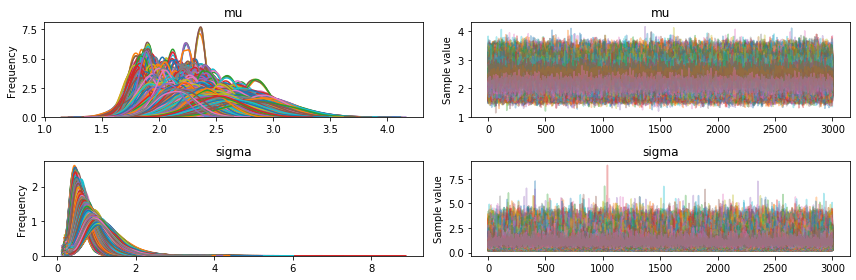

In [30]:
pm.traceplot(short_trace, varnames=['mu', 'sigma'])

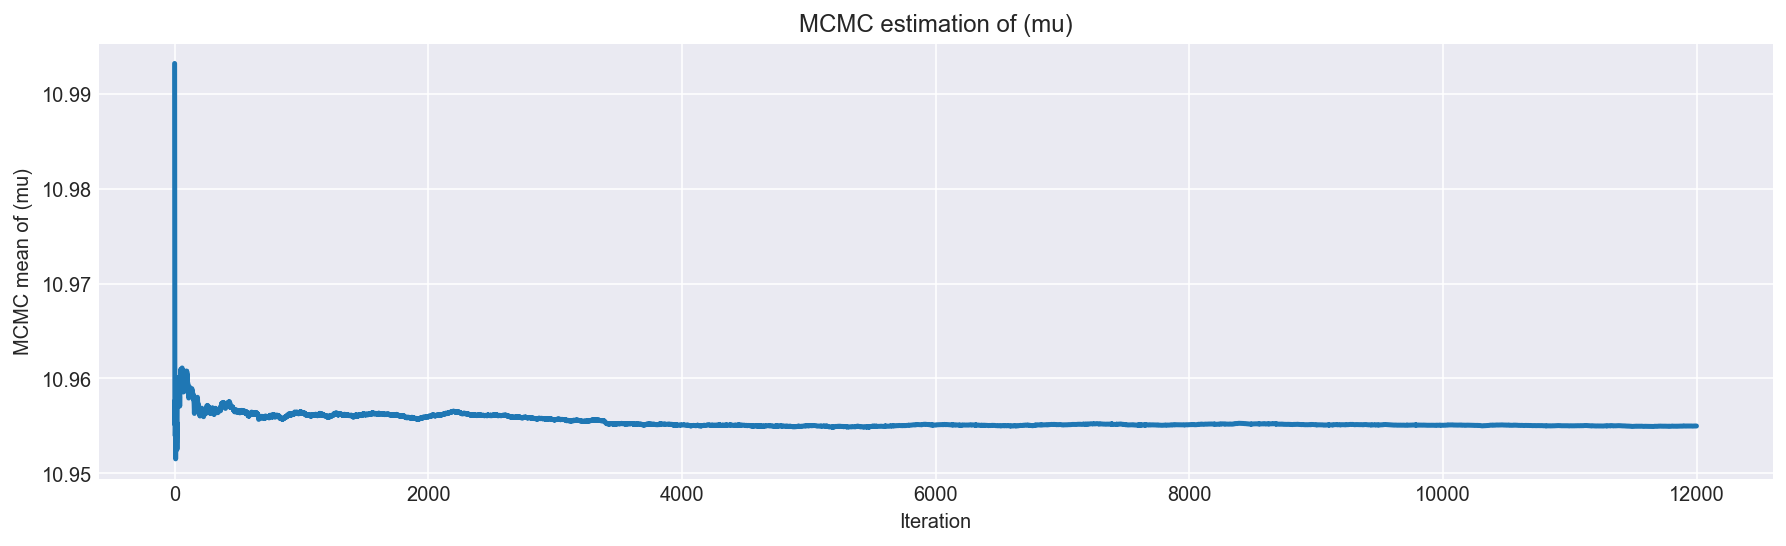

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

mu = np.exp(short_trace['mu'])
mmu = [np.mean(mu[:i]) for i in np.arange(1, len(mu))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(mmu, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of (mu)')
plt.title('MCMC estimation of (mu)');

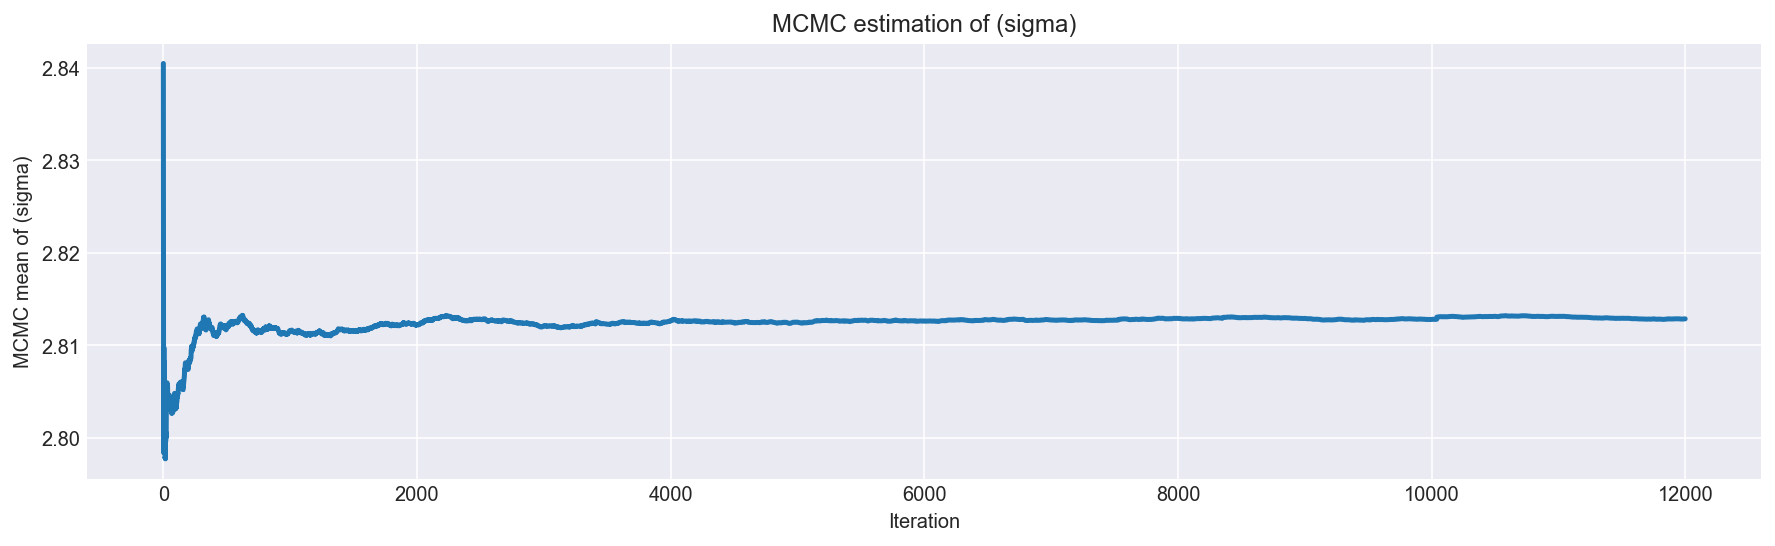

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

sigma = np.exp(short_trace['sigma'])
msigma = [np.mean(sigma[:i]) for i in np.arange(1, len(sigma))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(msigma, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of (sigma)')
plt.title('MCMC estimation of (sigma)');